In [40]:
import pandas as pd

In [41]:
train_csv = pd.read_csv('./train.csv')
train_csv = train_csv.drop(['id'], axis=1)
X = train_csv.drop(['target'], axis=1)
y = train_csv['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7 10]
 [ 4 29]]
              precision    recall  f1-score   support

         0.0       0.64      0.41      0.50        17
         1.0       0.74      0.88      0.81        33

    accuracy                           0.72        50
   macro avg       0.69      0.65      0.65        50
weighted avg       0.71      0.72      0.70        50



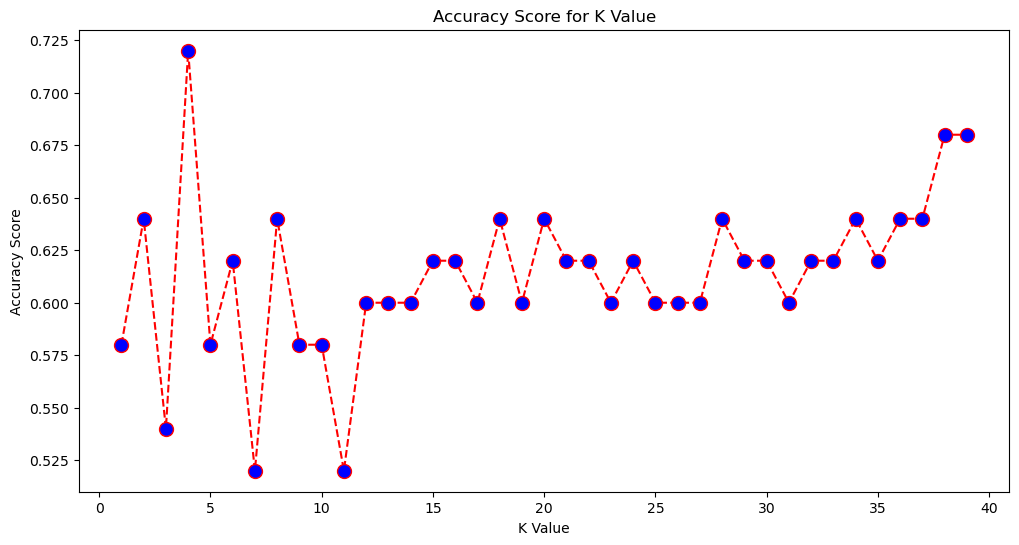

In [44]:
from sklearn.metrics import accuracy_score
score = []
for i in range(1, 40):
    K_value = i + 1
    knn = KNeighborsClassifier(n_neighbors=K_value, weights='uniform', algorithm='auto')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), score, color='red', linestyle='dashed', marker='o',
            markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score for K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.show()


In [45]:
knn = KNeighborsClassifier(n_neighbors=4)
test = pd.read_csv('./test.csv')
test_id = test['id']
test = test.drop(['id'], axis=1)
knn.fit(X, y)
y_pred = knn.predict(test).astype(int)
submission = pd.DataFrame({
    'id': test_id,
    'target': y_pred
})
submission.to_csv('submission_knn.csv', index=False)
